Module 01: Exploratory Analysis
===============================

Let’s begin our project by first getting to know the dataset. Our
initial analysis will allow us to start planning for our next steps in
data cleaning and feature engineering. This step should be quick, but
thorough enough for us to gain a basic intuition for addressing the
problem at hand.

Basic Information
-----------------

Here is an overview of our objectives for this phase:

-   Import data as a pandas dataframe
-   Review data shape (observations, features)
-   Review the data types to determine categorical vs numerical features
-   Reference the data dictionary and verify features weren’t imported
    as incorrect data type
-   Perform base analysis of dataset and get a qualitative feel

Let’s start by importing our libraries and make our initial
configurations.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
        
# change pandas option to view additional data frame columns
pd.set_option('display.max_columns', 100)

# display plots in the notebook
%matplotlib inline

Next, let’s load our data set.

In [2]:
# load the real estate data from the dataset folder
df = pd.read_csv('../dataset/real_estate_data.csv')

Now that our data set has been loaded, let’s get an initial
understanding on what we’re working with.

In [3]:
# the dataframe shape tells us the number of observations and features available
df.shape

(1883, 26)

In [4]:
# display the columns and sort them by index name
df.dtypes.sort_index()

active_life             int64
arts_entertainment      int64
basement              float64
baths                   int64
beauty_spas             int64
beds                    int64
cafes                   int64
college_grad          float64
exterior_walls         object
groceries               int64
insurance             float64
lot_size                int64
married               float64
median_age            float64
median_school         float64
nightlife               int64
num_schools           float64
property_tax          float64
property_type          object
restaurants             int64
roof                   object
shopping                int64
sqft                    int64
tx_price                int64
tx_year                 int64
year_built              int64
dtype: object

In [5]:
# determine which features are categorical
df.dtypes[df.dtypes == 'object']

property_type     object
exterior_walls    object
roof              object
dtype: object

In [6]:
# display the first five observations
df.head(5)

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
0,295850,1,1,584,2013,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,107,9,30,19,89,6,47,58,33.0,65.0,84.0,234.0,81.0,9.0,3.0,2013
1,216500,1,1,612,1965,0,Apartment / Condo / Townhouse,Brick,Composition Shingle,1.0,105,15,6,13,87,2,26,14,39.0,73.0,69.0,169.0,51.0,3.0,3.0,2006
2,279900,1,1,615,1963,0,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,183,13,31,30,101,10,74,62,28.0,15.0,86.0,216.0,74.0,8.0,3.0,2012
3,379900,1,1,618,2000,33541,Apartment / Condo / Townhouse,Wood Siding,NaN,NaN,198,9,38,25,127,11,72,83,36.0,25.0,91.0,265.0,92.0,9.0,3.0,2005
4,340000,1,1,634,1992,0,Apartment / Condo / Townhouse,Brick,NaN,NaN,149,7,22,20,83,10,50,73,37.0,20.0,75.0,88.0,30.0,9.0,3.0,2002


In [7]:
# display the last five observations
df.tail()

,tx_price,beds,baths,sqft,year_built,lot_size,property_type,exterior_walls,roof,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
1878,385000,5,6,6381,2004,224334,Single-Family,Stucco,Composition Shingle,1.0,0,0,0,0,3,0,0,1,46.0,76.0,87.0,1250.0,381.0,10.0,3.0,2002
1879,690000,5,6,6501,1956,23086,Single-Family,Brick,Composition Shingle,1.0,45,7,5,7,41,3,61,11,42.0,73.0,61.0,1553.0,473.0,9.0,3.0,2015
1880,600000,5,6,7064,1995,217800,Single-Family,Metal,Composition Shingle,1.0,5,1,1,1,8,2,1,2,43.0,87.0,66.0,942.0,287.0,8.0,1.0,1999
1881,759900,5,6,7500,2006,8886,Single-Family,Siding (Alum/Vinyl),Asphalt,1.0,18,2,4,0,5,1,8,6,43.0,61.0,51.0,803.0,245.0,5.0,2.0,2009
1882,735000,5,6,7515,1958,10497,Single-Family,Brick,Composition Shingle,1.0,0,0,0,1,2,2,0,5,37.0,80.0,86.0,1459.0,444.0,9.0,3.0,2015


Numeric Distribution
====================

After completing our basic observations, let’s review our numerical data
for the following:

-   Unexpected distributions (e.g. max value higher than normal)
-   Numbers outside of their boundaries (e.g. +100%)
-   Sparse data
-   Measurement errors

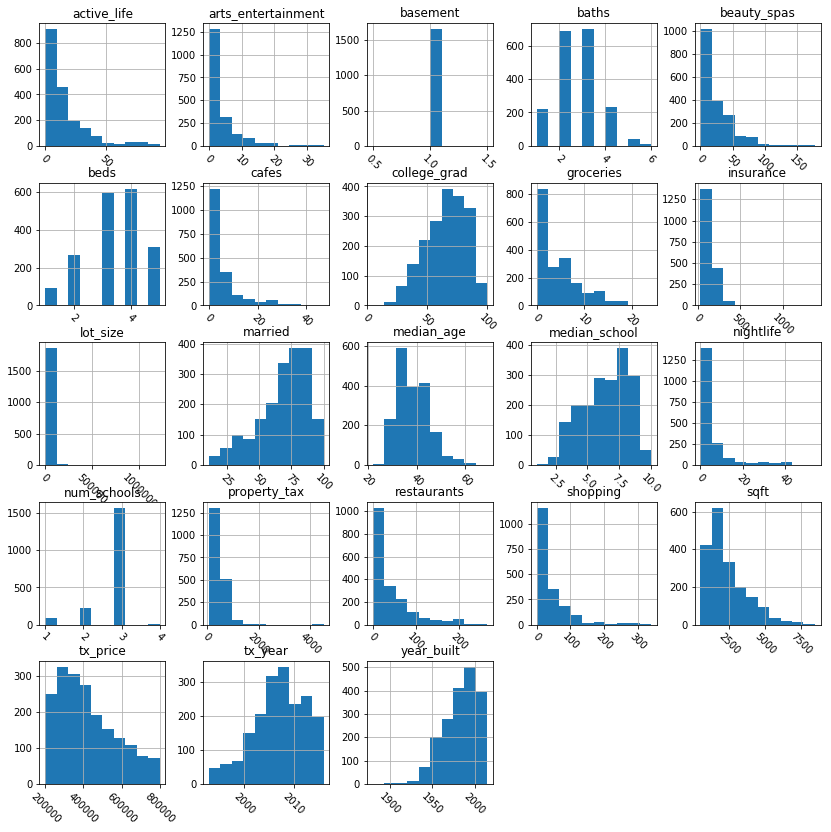

In [8]:
# plot histogram 
df.hist(figsize=(14, 14), xrot=-45)

# clear the text "residue"
plt.show()

While building a visual provides a quick interpretation of the data, it
lacks the detail necessary for a more in-depth analysis.

In [9]:
# display summary statistics, such as mean, std, and quartiles
df.describe()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
count,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1.883000e+03,1657.0,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000,1883.000000
mean,422839.807754,3.420605,2.579926,2329.398832,1982.963887,1.339262e+04,1.0,40.210303,4.505045,5.074881,5.325013,40.802443,3.394052,23.416888,15.835369,38.601168,69.091875,65.085502,466.777483,140.454063,6.502921,2.793415,2007.111524
std,151462.593276,1.068554,0.945576,1336.991858,20.295945,4.494930e+04,0.0,46.867012,4.491029,8.464668,7.539309,53.539296,4.699787,25.776916,17.667717,6.634110,19.659767,16.953165,231.656645,72.929765,1.996109,0.505358,5.196898
min,200000.000000,1.000000,1.000000,500.000000,1880.000000,0.000000e+00,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,11.000000,5.000000,88.000000,30.000000,1.000000,1.000000,1993.000000
25%,300000.000000,3.000000,2.000000,1345.000000,1970.000000,1.542000e+03,1.0,7.000000,1.000000,0.000000,0.000000,6.000000,0.000000,4.000000,4.000000,33.000000,58.000000,54.000000,320.000000,94.000000,5.000000,3.000000,2004.000000
50%,392000.000000,3.000000,3.000000,1907.000000,1986.000000,6.098000e+03,1.0,23.000000,3.000000,2.000000,3.000000,22.000000,2.000000,15.000000,10.000000,38.000000,73.000000,66.000000,426.000000,125.000000,7.000000,3.000000,2007.000000
75%,525000.000000,4.000000,3.000000,3005.000000,2000.000000,1.176100e+04,1.0,58.000000,7.000000,6.000000,6.000000,51.000000,5.000000,35.000000,21.000000,43.000000,84.000000,78.000000,569.000000,169.000000,8.000000,3.000000,2011.000000
max,800000.000000,5.000000,6.000000,8450.000000,2015.000000,1.220551e+06,1.0,266.000000,24.000000,54.000000,47.000000,340.000000,35.000000,177.000000,94.000000,69.000000,100.000000,100.000000,4508.000000,1374.000000,10.000000,4.000000,2016.000000


In [10]:
# we can specify summary statistics for a particular observation
df.basement.describe()

count    1657.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: basement, dtype: float64

At a quick glance, our numerical data appears to make sense. At this
point, we can consider features that could potentially be replaced by
booleans, such as the basement feature.

Categorical Distribution
------------------------

Let’s review the categorical data for the following:

-   Observe class frequency
-   Account for sparse data that could be combined or reassigned

In [11]:
# filter our observations by object type to provide descriptions
df.describe(include=['object'])

,property_type,exterior_walls,roof
count,1883,1660,1529
unique,2,16,16
top,Single-Family,Brick,Composition Shingle
freq,1080,687,1179


From our object type descriptions, we see that some features contain
multiple unique values. We can build a seaborn countplot visual to
better understand their distribution.

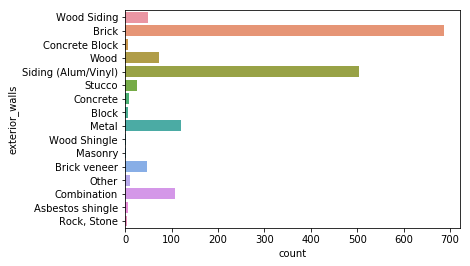

In [12]:
# display a barplot with the count for y variables
sns.countplot(y='exterior_walls', data=df)

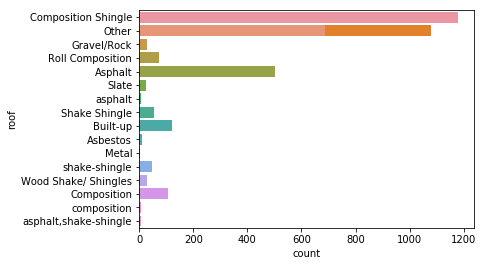

In [13]:
# barplot with count for each object index
for index in df.dtypes[df.dtypes == 'object'].index:
    sns.countplot(y=index, data=df)

At this point, we should have started to think of features we can
consider consolidating.

Segmentations
-------------

Review segmentation to observe the relationship between categorical and
numeric features.

-   Build a boxplot to segment the target variable (tx\_price) by key
    categorical features.

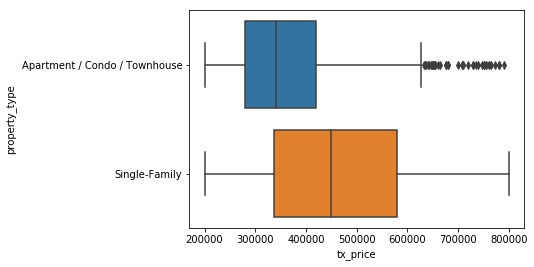

In [14]:
# use boxplot for a visual interpretation
sns.boxplot(y='property_type', x='tx_price', data=df)

In [15]:
# segment by property_type and get means for each class
df.groupby('property_type').mean()

,tx_price,beds,baths,sqft,year_built,lot_size,basement,restaurants,groceries,nightlife,cafes,shopping,arts_entertainment,beauty_spas,active_life,median_age,married,college_grad,property_tax,insurance,median_school,num_schools,tx_year
property_type,,,,,,,,,,,,,,,,,,,,,,,
Apartment / Condo / Townhouse,366614.034869,2.601494,2.200498,1513.727273,1988.936488,3944.239103,1.0,58.418431,5.919054,7.855542,8.037360,57.631382,4.840598,32.087173,22.410959,37.199253,57.534247,66.372354,346.261519,105.652553,6.382316,2.831880,2007.941469
Single-Family,464644.711111,4.029630,2.862037,2935.865741,1978.523148,20417.666667,1.0,26.672222,3.453704,3.007407,3.308333,28.289815,2.318519,16.970370,10.946296,39.643519,77.685185,64.128704,556.383333,166.329630,6.592593,2.764815,2006.494444


In [16]:
# segment by property_type and get both mean and std for each class
df.groupby('property_type').agg(['mean', 'std'])

tx_price                     beds  \
                                        mean            std      mean   
property_type                                                           
Apartment / Condo / Townhouse  366614.034869  121784.490486  2.601494   
Single-Family                  464644.711111  157758.739013  4.029630   

                                            baths                   sqft  \
                                    std      mean       std         mean   
property_type                                                              
Apartment / Condo / Townhouse  0.810220  2.200498  0.815009  1513.727273   
Single-Family                  0.795639  2.862037  0.937551  2935.865741   

                                             year_built             \
                                       std         mean        std   
property_type                                                        
Apartment / Condo / Townhouse   556.286650  1988.936488  15.513640   
Single-Family                  1422.871169  1978.523148  22.210582   

                                   lot_size               basement       \
                                       mean           std     mean  std   
property_type                                                             
Apartment / Condo / Townhouse   3944.239103  44284.168767      1.0  0.0   
Single-Family                  20417.666667  44165.529302      1.0  0.0   

                              restaurants            groceries            \
                                     mean        std      mean       std   
property_type                                                              
Apartment / Condo / Townhouse   58.418431  54.343594  5.919054  4.645774   
Single-Family                   26.672222  34.726416  3.453704  4.067285   

                              nightlife                cafes            \
                                   mean        std      mean       std   
property_type                                                            
Apartment / Condo / Townhouse  7.855542  10.643816  8.037360  9.077038   
Single-Family                  3.007407   5.543822  3.308333  5.325053   

                                shopping            arts_entertainment  \
                                    mean        std               mean   
property_type                                                            
Apartment / Condo / Townhouse  57.631382  61.852299           4.840598   
Single-Family                  28.289815  42.292313           2.318519   

                                        beauty_spas            active_life  \
                                    std        mean        std        mean   
property_type                                                                
Apartment / Condo / Townhouse  5.234834   32.087173  26.910443   22.410959   
Single-Family                  3.929691   16.970370  22.872112   10.946296   

                                         median_age              married  \
                                     std       mean       std       mean   
property_type                                                              
Apartment / Condo / Townhouse  21.058178  37.199253  6.906584  57.534247   
Single-Family                  12.599296  39.643519  6.225732  77.685185   

                                         college_grad            property_tax  \
                                     std         mean        std         mean   
property_type                                                                   
Apartment / Condo / Townhouse  20.372706    66.372354  17.095874   346.261519   
Single-Family                  13.868205    64.128704  16.790347   556.383333   

                                            insurance             \
                                      std        mean        std   
property_type                                                      
Apartment / Condo / Townhouse  142.292282  105.652553  47

When comparing our features, we should consider the following questions:

-   On average, which type of property is larger?

-   Which type of property has larger lots?

-   Which property is in areas of more nightlife/restaurants/grocery
    stores?

-   Are there any relationships that make intuitive sense?

Correlation
-----------

Correlate relationships between numeric features:

-   Search for strong correlations for target variable

To start, we can assess our correlations against our target value.

In [17]:
# Calculate correlation between numeric features
correlations = df.corr()
correlations.tx_price.sort_values(ascending=True)

groceries            -0.094314
beauty_spas          -0.054349
shopping             -0.038246
restaurants          -0.038027
arts_entertainment   -0.021076
num_schools          -0.014380
cafes                -0.001398
active_life          -0.001165
nightlife             0.009361
year_built            0.033138
tx_year               0.108782
median_age            0.126335
lot_size              0.130558
median_school         0.175762
married               0.200494
college_grad          0.268577
beds                  0.384046
baths                 0.389375
sqft                  0.469573
insurance             0.532947
property_tax          0.535148
tx_price              1.000000
basement                   NaN
Name: tx_price, dtype: float64

Knowing that we have different property types, we can build correlations
for each types for further analysis.

In [18]:
apt_correlation = df[df.property_type != 'Single-Family'].corr()
apt_correlation.tx_price.sort_values(ascending=False)

tx_price              1.000000
property_tax          0.692438
insurance             0.685928
sqft                  0.438968
baths                 0.286088
college_grad          0.281063
year_built            0.257050
beds                  0.229196
active_life           0.223561
nightlife             0.223141
restaurants           0.216635
cafes                 0.215771
median_school         0.175832
beauty_spas           0.169715
shopping              0.166469
arts_entertainment    0.148117
groceries             0.079035
num_schools           0.049614
tx_year               0.030961
median_age            0.002131
lot_size             -0.011940
married              -0.023177
basement                   NaN
Name: tx_price, dtype: float64

In [19]:
single_correlation = df[df.property_type == 'Single-Family'].corr()
single_correlation.tx_price.sort_values(ascending=False)

tx_price              1.000000
insurance             0.391297
property_tax          0.390150
sqft                  0.375309
baths                 0.327776
college_grad          0.325357
beds                  0.253710
tx_year               0.216577
median_school         0.165290
lot_size              0.130448
median_age            0.119946
married               0.110095
year_built            0.072044
active_life           0.024218
cafes                 0.021197
arts_entertainment    0.014807
nightlife             0.010067
num_schools          -0.013652
shopping             -0.036756
restaurants          -0.037989
beauty_spas          -0.041842
groceries            -0.065420
basement                   NaN
Name: tx_price, dtype: float64

We can also create a Seaborn heatmap to better visualize the
correlations.

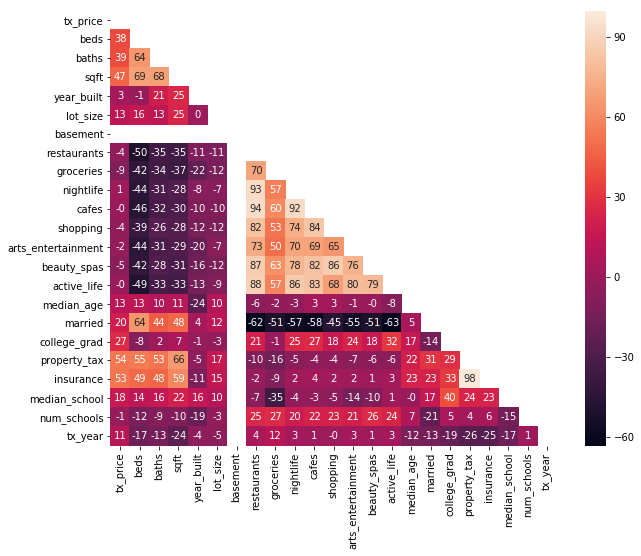

In [20]:
# create pyplot figure
plt.figure(figsize=(10, 8))

# generate mask to create triangle figure
mask = np.zeros_like(correlations, dtype=np.bool) # 2d ndarry bool values, same shape as correlations

mask[np.triu_indices_from(mask)] = True # set upper triangle indices to True

# plot heatmap as triangle
sns.heatmap(correlations * 100, annot=True, fmt='.0f', mask=mask)

Next Module
-----------

[02. Data Cleaning](module02.md)